# MACHINE LEARNING PROJECT - Heart stroke prediction

# Stroke Prediction using Machine Learning

## Dataset Description -
The dataset used in this article contains 5110 records of patients. Each patient has 12 columns each referring to a concrete attribute. Most of these attributes correspond to medical records or the results of clinical trials. Some of the key attributes are hypertension, heart diseases, average glucose levels in the blood, and body mass index (BMI). As we can observe from these first attributes, the dataset provides relevant data regarding the likelihood of patients suffering from stroke disease. It is easy to understand that a patient with high glucose levels and BMI, who has suffered from heart diseases and/or hypertension, is more likely to suffer from stroke. In fact, stroke is also an attribute in the dataset and indicates in each medical record if the patient suffered from a stroke disease or not.

## Data Dictionary -

- Id - Unique Id
- gender
- age
- hypertension - Binary Feature
- Heart_disease - Binary Feature
- Ever_married - Has the patient ever been married 
- Work_type - Work type of a patient 
- Residency_type - Residency type of patient
- avg_glucose_level - Average Glucose level in the blood j)bmi - Body mass Index
- smoking_status - Smoking status of the patient
- stroke - stroke event

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import random
import scipy.stats as stats 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sma
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score, accuracy_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 25,18

#### 1. Read the dataset and view the first 10 rows of it.

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- The data consists of 12 columns and 5110 rows.
- There are 7 numerical columns and 5 categorical columns present.
- Null values are present in the bmi column.
- All the columns have the correct datatype.

#### 2. Check the shape/dimension of the dataset

In [5]:
df.shape

(5110, 12)

#### 3. Check for the missing values.Display number of missing values per column.

In [6]:
(df.isnull().sum()/len(df))*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [7]:
df['bmi'].isnull().sum()

201

There are a total of 201 null values present in the bmi column, which is approximately 3.9% of the data in the column.

#### 4. Investigate and predict the missing BMI Value.

As only 3% of the data consists of null values, they can be replaced with the median value of the 'bmi' column without making a huge impact on how it affects the role of the column in the further process of analysis.

In [8]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [9]:
df['bmi'].isnull().sum()

0

After the null values treatment there are no null values present in bmi column.

#### 5. Check the datatype, number of non null values and name of each variable in the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### 6. Check the descriptive statistics of the dataset.

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- Here the columns hypertension and heart disease have a comparatively lower standard deviation showcasing low variance in the data.
- Similarly age,bmi and avg_glucose_level have a significantly higher variance, showcasing that the datapoints are widely spread.
- The variation in data helps us understand which columns have a higher correlation with the target variable.

#### 7. Visualize the proportion of Stroke samples in the dataset.

<AxesSubplot:ylabel='stroke'>

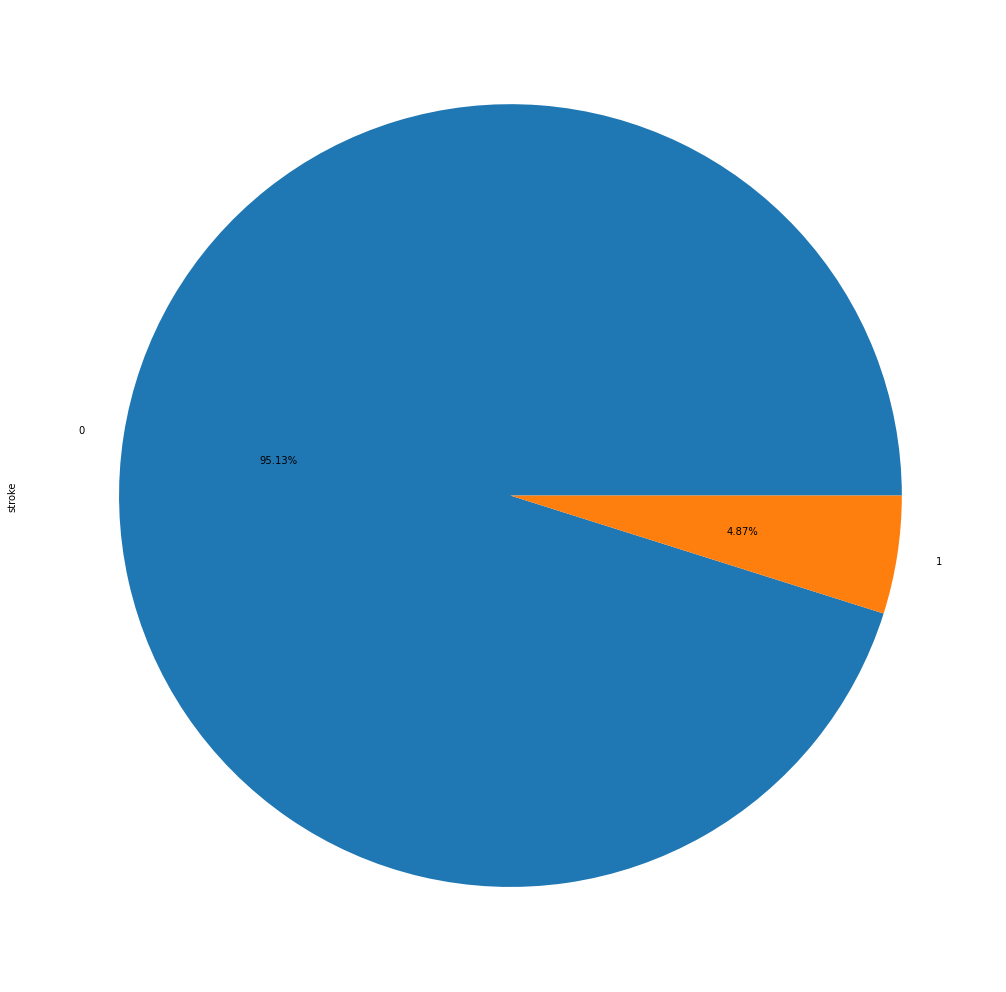

In [12]:
df['stroke'].value_counts().plot(kind = 'pie',autopct='%1.2f%%')

- 0 represents that the patient has not suffered a stroke which is 95.13% of the data.
- 1 represents the number of patients who have experienced a stroke which is 4.87% of the data.
- It can be observed that there is a significantly heighr imbalance in the classes of the target variable.

#### 8. Visualize the Distribution of Male and Female Ages. Write the Observation.

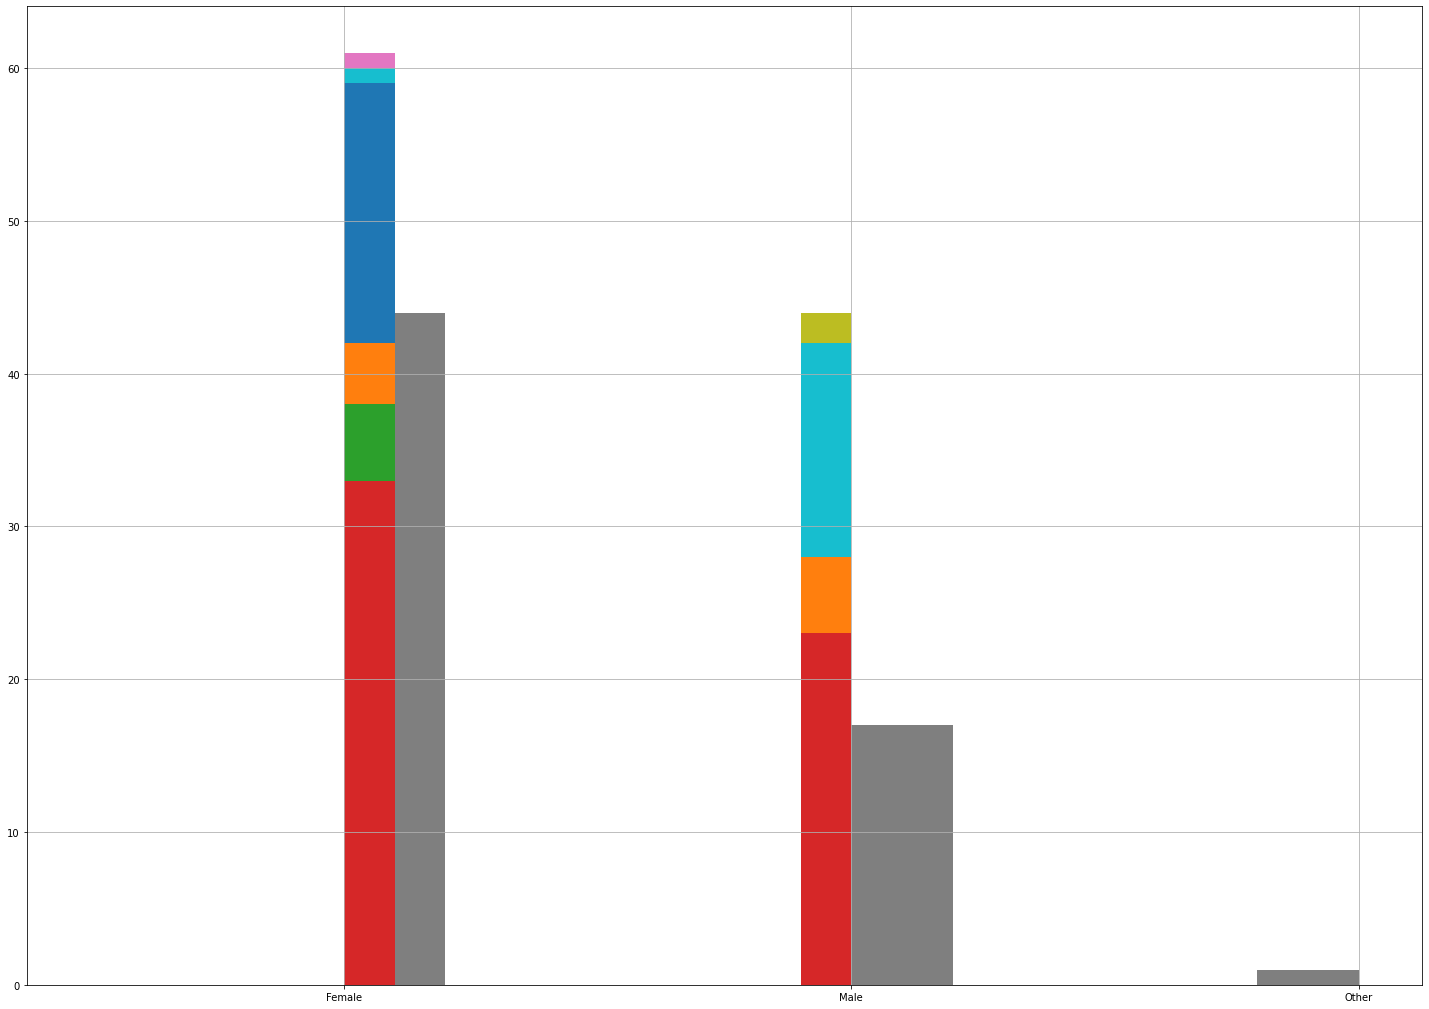

In [13]:
df.groupby('age')['gender'].hist()
plt.show()

- The data has majority of female in the age group 0 to 35.
- The majority of male are in the age group 0 to 25.
- It can be observed that the data has more female patient records.

##### 10.Visualize the stroke sample based on
##### a) BMI and Glucose Level 
##### b) BMI and Age


<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

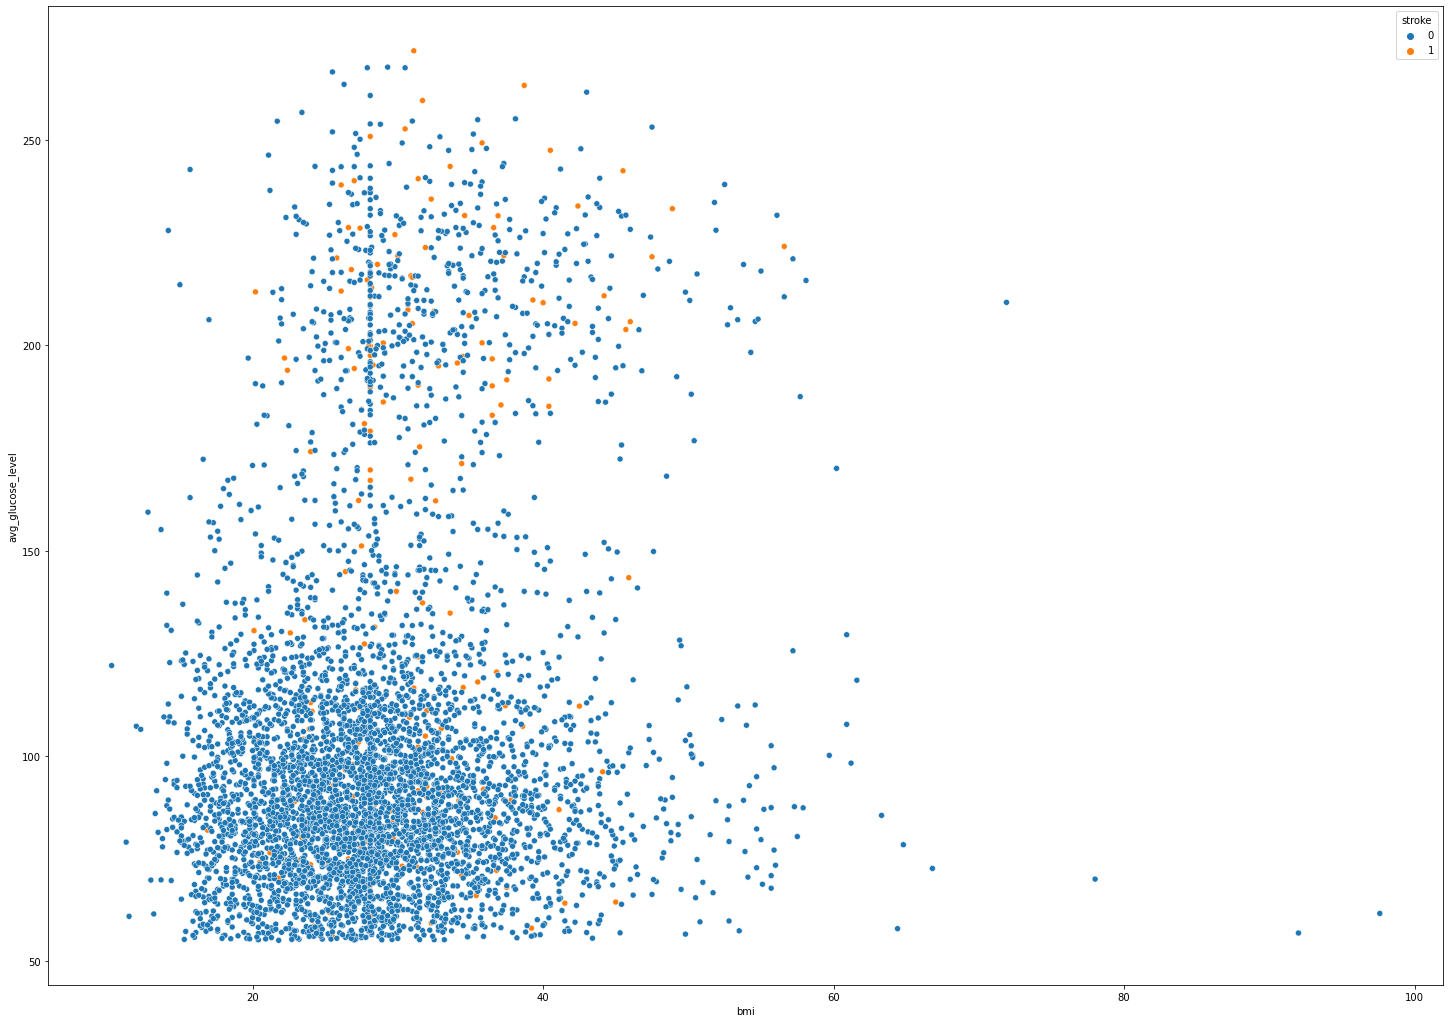

In [14]:
sns.scatterplot(df['bmi'],df['avg_glucose_level'],hue = df['stroke'])

<AxesSubplot:xlabel='bmi', ylabel='age'>

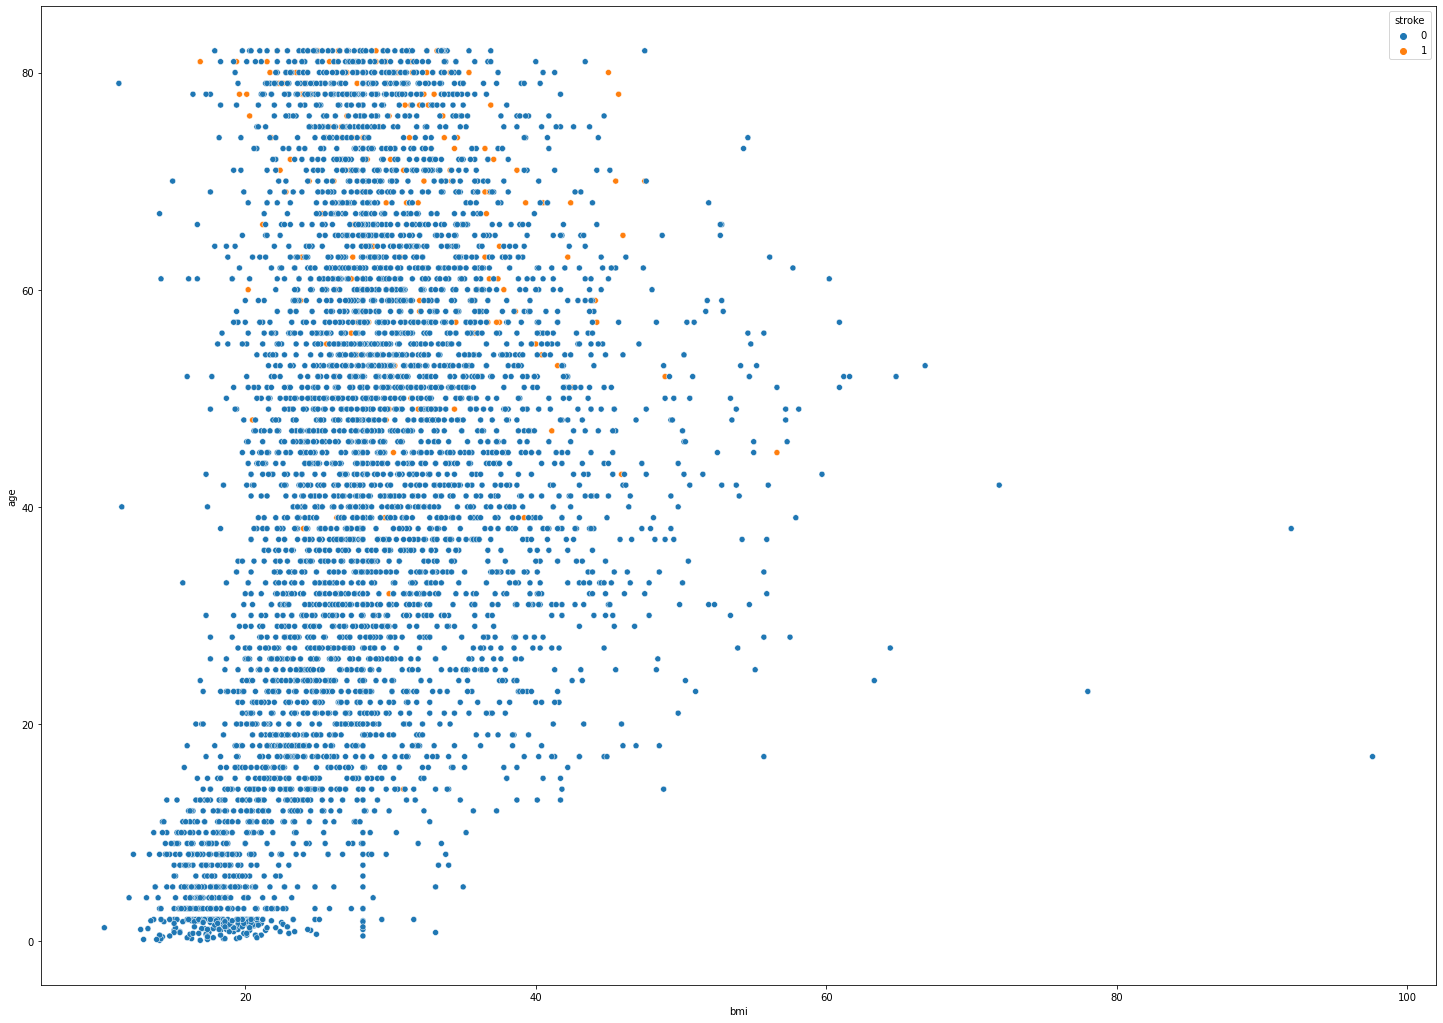

In [15]:
sns.scatterplot(df['bmi'],df['age'],hue = df['stroke'])

#### 11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population.

<AxesSubplot:ylabel='stroke'>

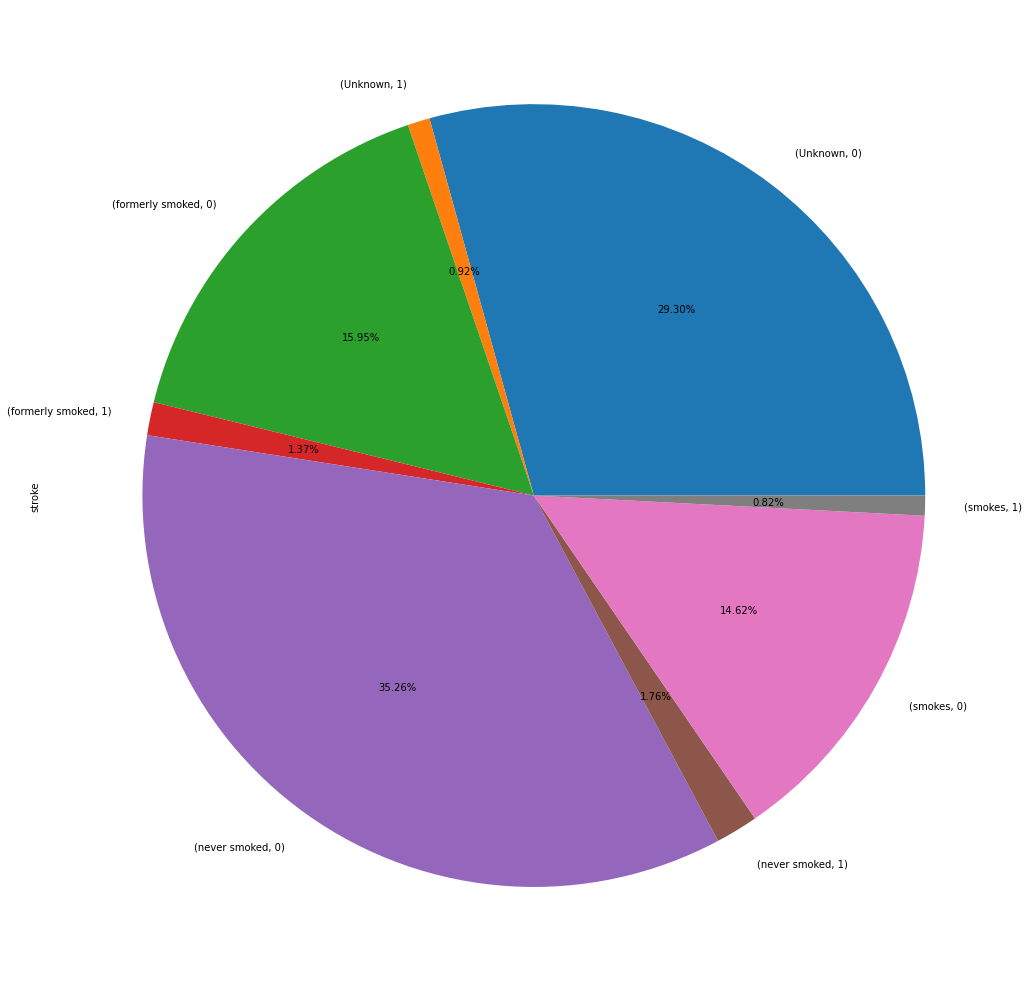

In [16]:
df.groupby('smoking_status')['stroke'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%')

#### 12. Perform hypothesis testing to find the significant variables.

h0 : variables are significant

h1 : variables are not significant

alpha value is 0.05

In [17]:
# let's check the categorical variables and their significance with the target variable.

In [18]:
#for gender

df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [19]:
gender_female = df[df['gender']=='Female']['stroke']
gender_male = df[df['gender']=='Male']['stroke']
gender_other = df[df['gender']=='Other']['stroke']

In [20]:
stats.f_oneway(gender_female,gender_male,gender_other)

F_onewayResult(statistic=0.2361764325989386, pvalue=0.7896499672462672)

Pvalue is more than alpha, we accept the null hypothesis. Gender column is an significant variable.

In [21]:
# for ever_married

df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
married_yes = df[df['ever_married']=='Yes']['stroke']
married_no = df[df['ever_married']=='No']['stroke']

In [23]:
stats.f_oneway(married_yes,married_no)

F_onewayResult(statistic=60.667229655920735, pvalue=8.128658950932845e-15)

Here the pvalue is not greater than 0.05. hence in this case it can be said that ever_married column is not as significant.

In [24]:
# for work_type

df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [25]:
private = df[df['work_type']=='Private']['stroke']
self_employed = df[df['work_type']=='Self-employed']['stroke']
govt_job = df[df['work_type']=='Govt_job']['stroke']
children = df[df['work_type']=='children']['stroke']
never_worked = df[df['work_type']=='Never_worked']['stroke']

In [26]:
stats.f_oneway(private,self_employed,govt_job,children,never_worked)

F_onewayResult(statistic=12.398134638161164, pvalue=4.904669760523591e-10)

here we can say that the work type column is not that significant.

In [27]:
# for Residence_type

df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [28]:
urban = df[df['Residence_type']=='Urban']['stroke']
rural = df[df['Residence_type']=='Rural']['stroke']

In [29]:
stats.f_oneway(urban,rural)

F_onewayResult(statistic=1.2208416612473314, pvalue=0.26924758060834464)

here pval is still less so we can say that the column residence_type is insignificant.

In [30]:
# for smoking_status

df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [31]:
formerly_smoked = df[df['smoking_status']=='formerly smoked']['stroke']
never_smoked = df[df['smoking_status']=='never smoked']['stroke']
smokes = df[df['smoking_status']=='smokes']['stroke']
unknown = df[df['smoking_status']=='Unkown']['stroke']

In [32]:
stats.f_oneway(formerly_smoked,never_smoked,smokes,unknown)

F_onewayResult(statistic=nan, pvalue=nan)

In [33]:
# for numerical columns

df_num = df.select_dtypes(include = np.number)

In [34]:
stats.chi2_contingency(df_num)

(2222805.4194292673,
 0.0,
 30654,
 array([[9.33467810e+03, 1.10495760e+01, 2.49116695e-02, ...,
         2.71334418e+01, 7.37770599e+00, 1.24558348e-02],
        [5.17156128e+04, 6.12164221e+01, 1.38014642e-01, ...,
         1.50323616e+02, 4.08736736e+01, 6.90073209e-02],
        [3.11800653e+04, 3.69082360e+01, 8.32109554e-02, ...,
         9.06322080e+01, 2.46433087e+01, 4.16054777e-02],
        ...,
        [1.97749639e+04, 2.34078738e+01, 5.27738996e-02, ...,
         5.74805929e+01, 1.56292341e+01, 2.63869498e-02],
        [3.76031503e+04, 4.45113225e+01, 1.00352390e-01, ...,
         1.09302418e+02, 2.97198236e+01, 5.01761948e-02],
        [4.46164712e+04, 5.28130788e+01, 1.19069000e-01, ...,
         1.29688288e+02, 3.52628342e+01, 5.95345000e-02]]))

In [35]:
# her pval is still less 

#### 13. Drop the unnecessary columns.

<AxesSubplot:>

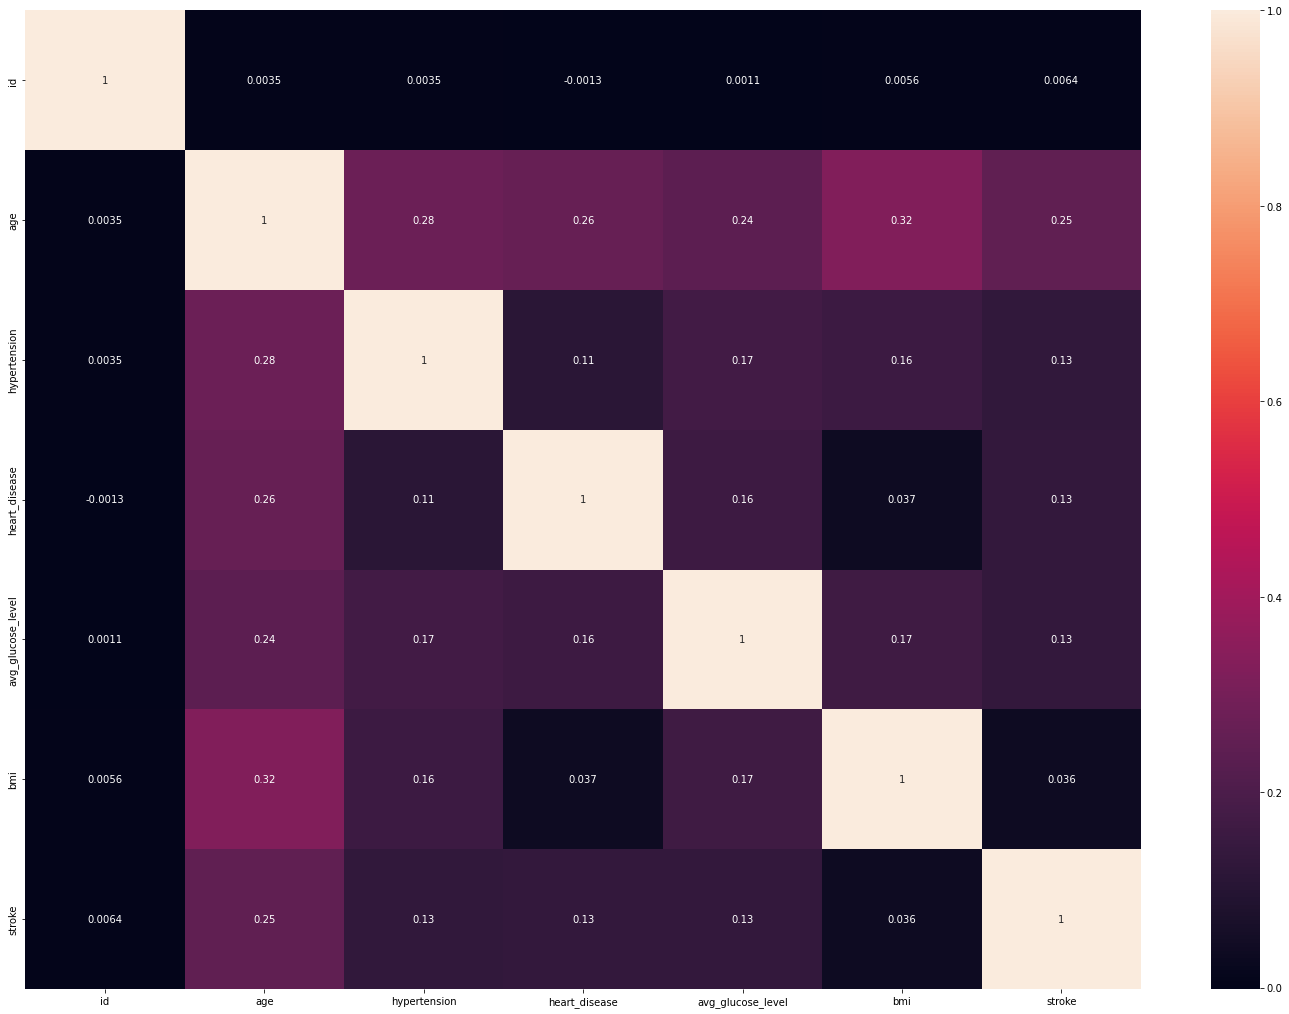

In [36]:
sns.heatmap(df.corr(),annot = True)

- Using the hypothesis testing method it can be observed that the columns are not displaying a higher significance.
- However if we compare them with the heatmap for each column, they display a correlation with the target variable to an extent.
- The column id will be dropped as it has maximum unique values.

In [37]:
df_new = df.drop('id',axis = 1)

#### 14. Write the code to replace following categories columns in integer format as follow –


a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)


b) ever_married('Yes': 1, 'No': 0)

c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [38]:
# for work_type

df_new['work_type'] = np.where(df_new['work_type']=='Private',0,df_new['work_type'])

In [39]:
df_new['work_type'] = np.where(df_new['work_type']=='Self-employed',1,df_new['work_type'])
df_new['work_type'] = np.where(df_new['work_type']=='Govt_job',2,df_new['work_type'])
df_new['work_type'] = np.where(df_new['work_type']=='children',1,df_new['work_type'])
df_new['work_type'] = np.where(df_new['work_type']=='Never_worked',2,df_new['work_type'])

In [40]:
# for ever_married

df_new['ever_married'] = np.where(df_new['ever_married']=='Yes',1,df_new['ever_married'])
df_new['ever_married'] = np.where(df_new['ever_married']=='No',0,df_new['ever_married'])

In [41]:
# for smoking_status

df_new['smoking_status'] = np.where(df_new['smoking_status']=='never smoked',0,df_new['smoking_status'])
df_new['smoking_status'] = np.where(df_new['smoking_status']=='Unknown',1,df_new['smoking_status'])
df_new['smoking_status'] = np.where(df_new['smoking_status']=='formerly smoked',2,df_new['smoking_status'])
df_new['smoking_status'] = np.where(df_new['smoking_status']=='smokes',1,df_new['smoking_status'])

In [42]:
df_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,0,Urban,228.69,36.6,2,1
1,Female,61.0,0,0,1,1,Rural,202.21,28.1,0,1
2,Male,80.0,0,1,1,0,Rural,105.92,32.5,0,1
3,Female,49.0,0,0,1,0,Urban,171.23,34.4,1,1
4,Female,79.0,1,0,1,1,Rural,174.12,24.0,0,1


In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [44]:
df_new['work_type']=pd.to_numeric(df_new['work_type'])
df_new['ever_married']=pd.to_numeric(df_new['ever_married'])
df_new['smoking_status']=pd.to_numeric(df_new['smoking_status'])

In [45]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 439.3+ KB


In [76]:
# since we haven't dropped the other categorical columns yet we will encode them for model building

df_new = pd.get_dummies(df_new,drop_first = True)

#### 15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.

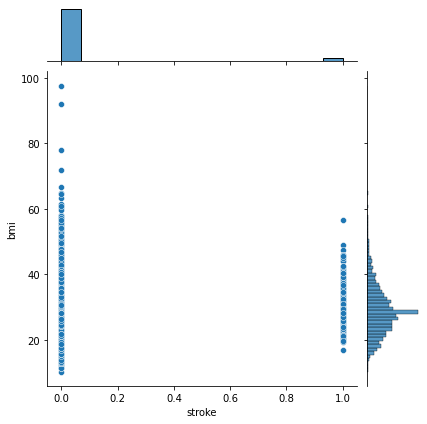

In [47]:
sns.jointplot(df_new['stroke'],df_new['bmi'])

#### 16. List down columns that are highly skewed.

In [48]:
df_new.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type            0.875185
avg_glucose_level    1.572284
bmi                  1.088187
smoking_status       0.303923
stroke               4.193284
dtype: float64

- The columns hypertension, heart_disease, stroke, are higghly posititvely skewed. it means that the data is more dense on the left side of the columns.
- The columns avg_glucose_level, bmi, work_type, smoking_status are closer but greater than zero showcasing a positive skewness. it means they have somewhat of a normal distribution of datapoints.
- age and ever_married are showcasing a negative skewness meaning the datapoints have more density on the right side

#### 17. List down the columns that are highly kurtosis.

In [49]:
df_new.kurt()

age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type            -0.566210
avg_glucose_level     1.680479
bmi                   3.635306
smoking_status       -0.996085
stroke               15.589736
dtype: float64

Columns hypertension, heart disease, bmi, stroke display leptokurtic(higher) kurtosis.

#### 18. Find the distribution of all variables with respect to the outcome 'stroke' variable.

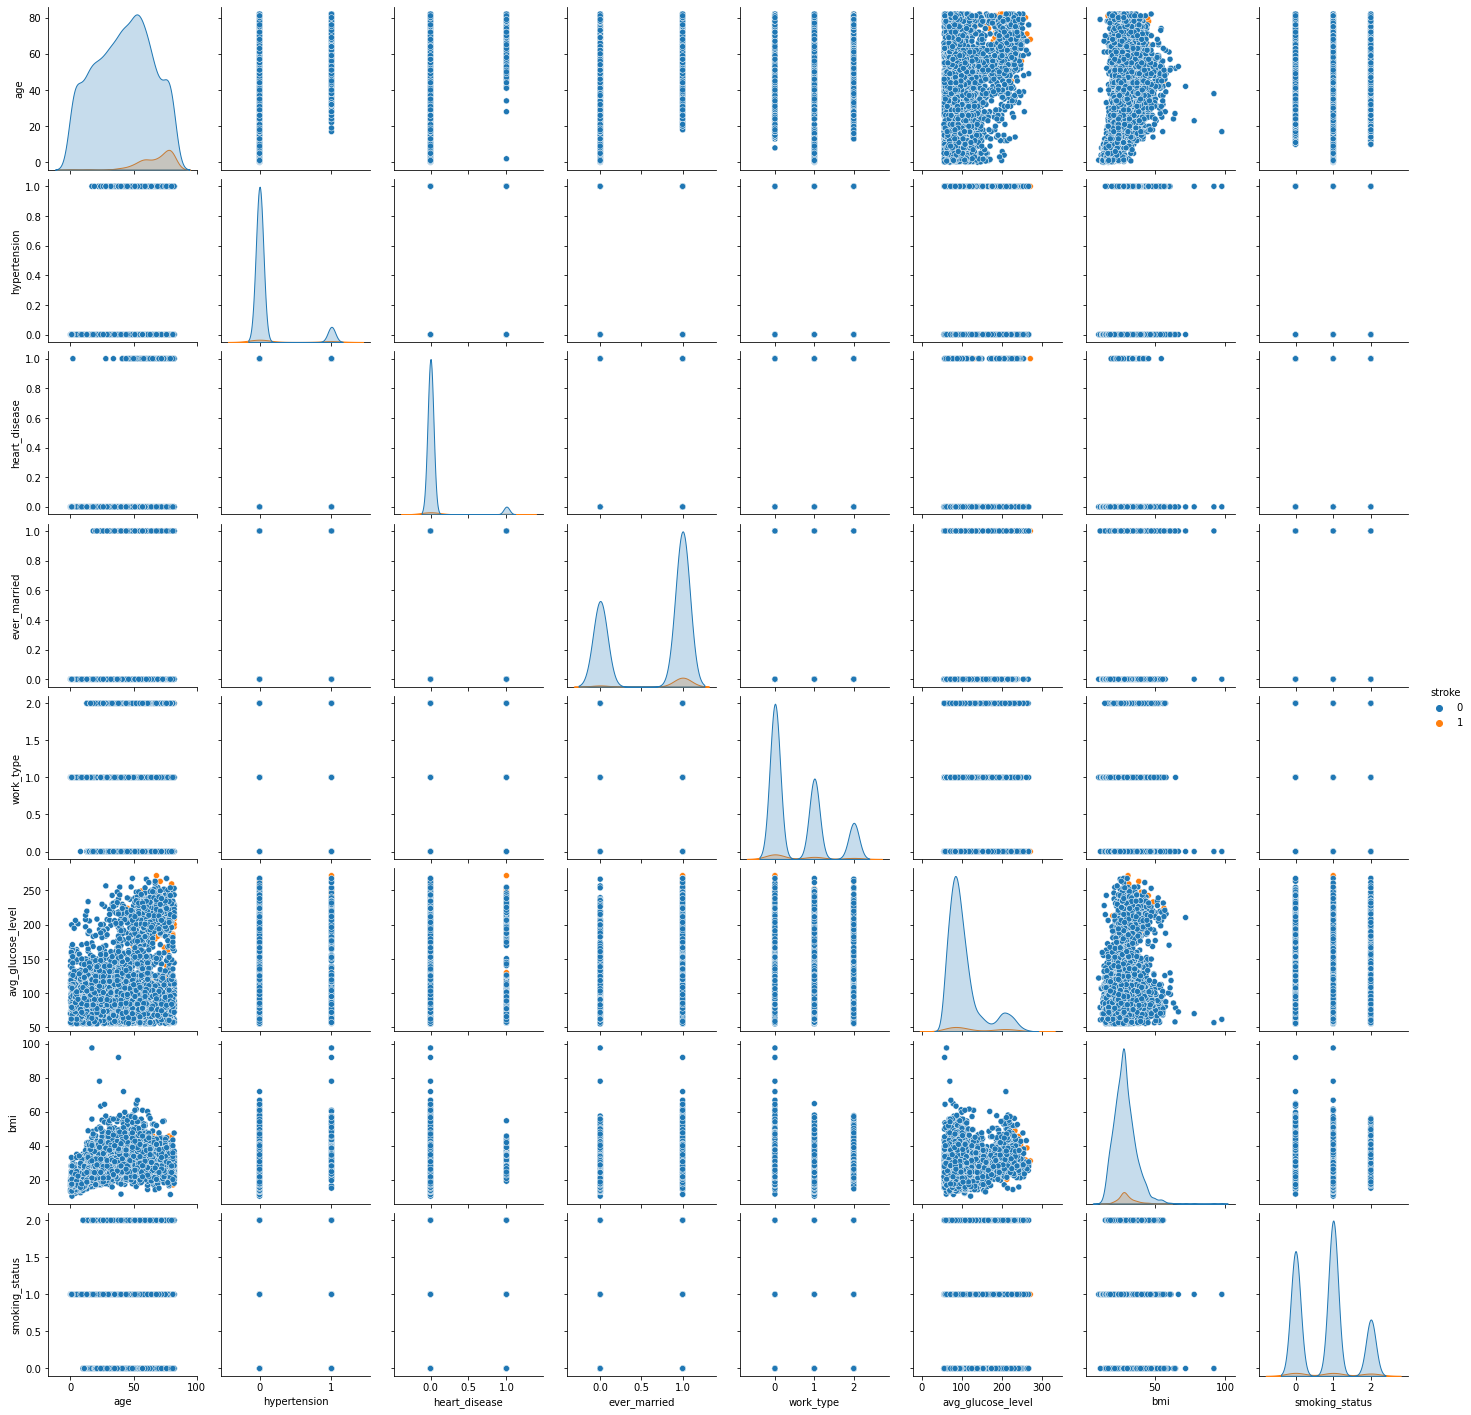

In [50]:
sns.pairplot(df_new,hue = 'stroke')

Since there is an imbalance in the data, it can be observed that the distribution of patients who have experienced a stroke in all the variables is scarce and widely spread.

#### 19. Plot the heatmap for correlation matrix for the given dataset. Write the observation. Especially note down columns that are highly correlated (Positive or negative correlation, consider 0.7 to 1 as high)

<AxesSubplot:>

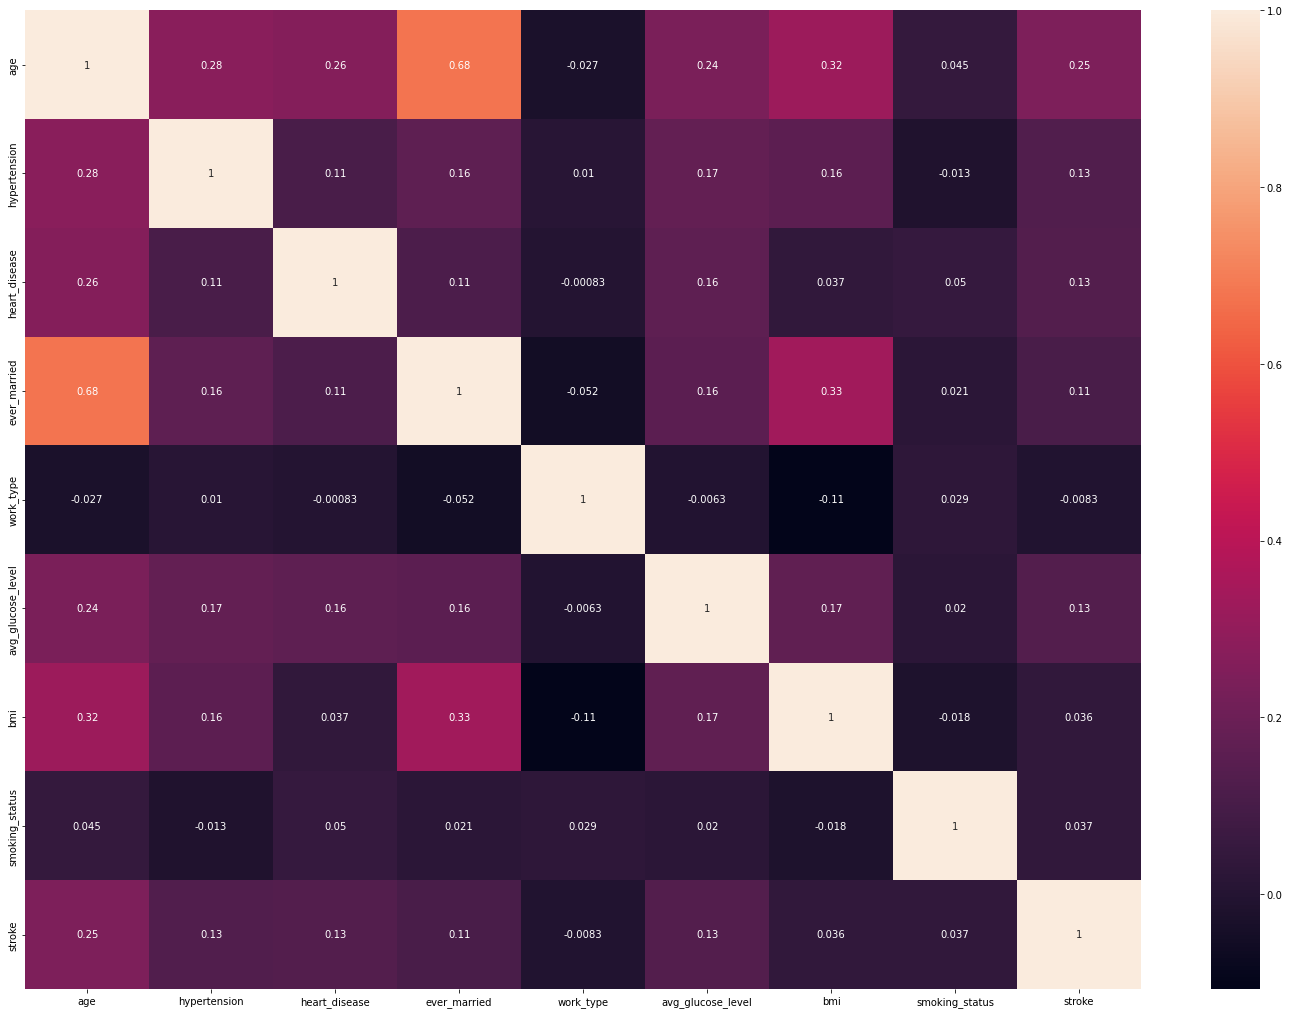

In [51]:
sns.heatmap(df_new.corr(),annot = True)

- the column work type is highly negatively correlated with the target variable.
- All the other columns have a moderate to low correlation with the target variable

#### 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.

<AxesSubplot:>

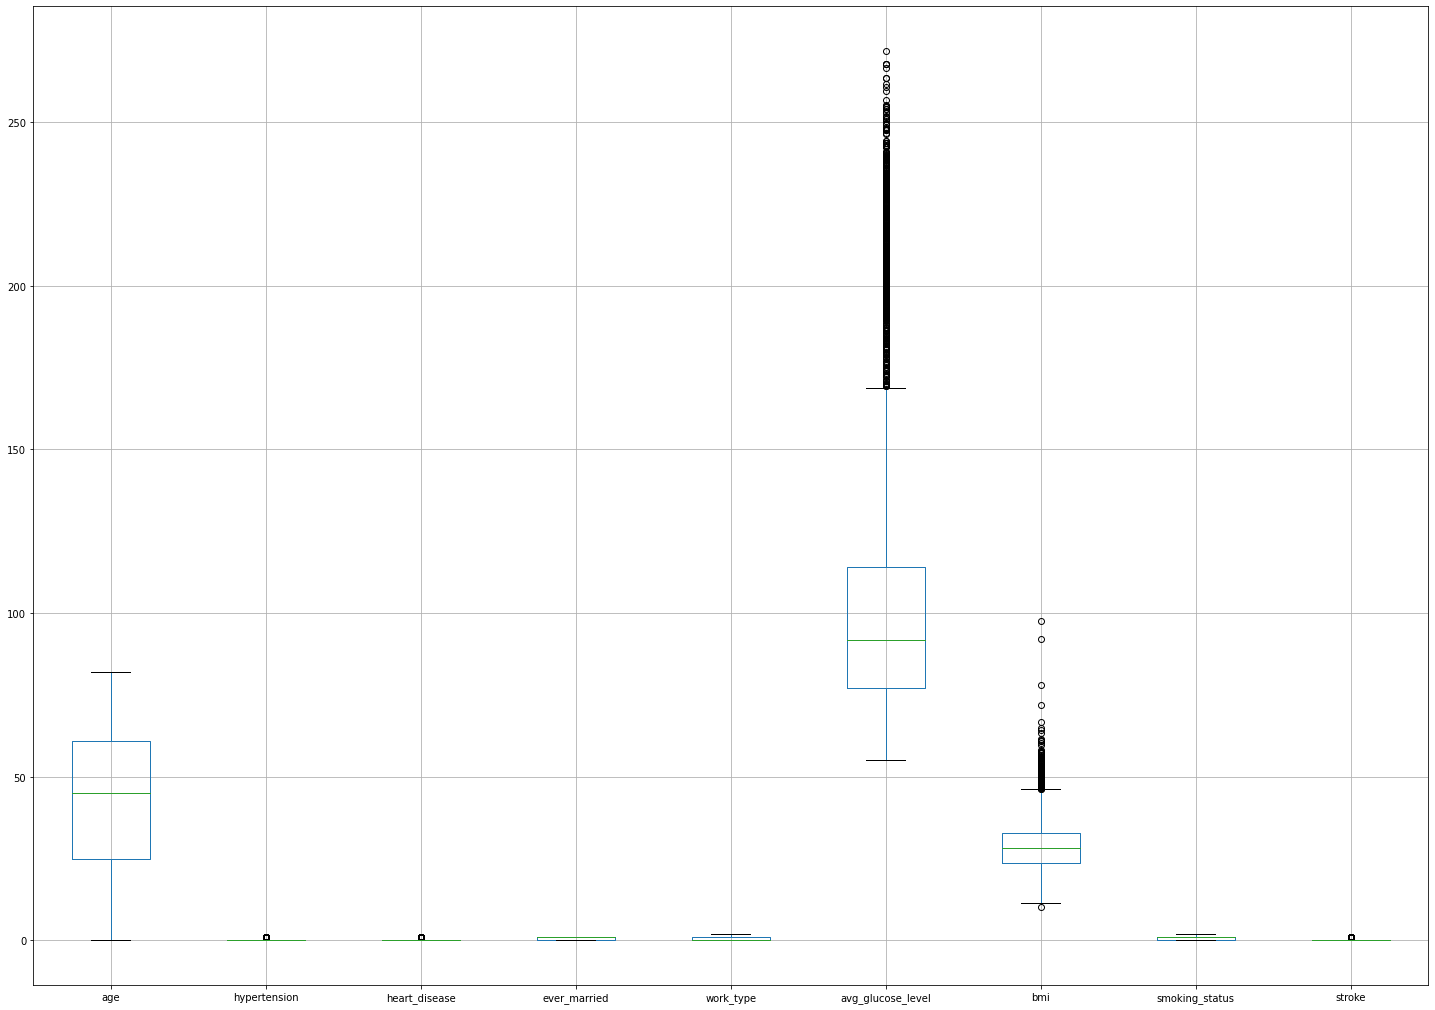

In [52]:
# firstly we'll prepare the data accordingly by checking for outliers

df_new.boxplot()

- the columns avg glucose level and bmi seems to have the hgihest number of outliers
- these outliers might cause a problem during model building as datapoints might get misclassified by the algorithm.

In [53]:
df_out = df_new[['avg_glucose_level','bmi']]

In [54]:
# since majority of outliers are present above the upper whisker,we'll perform outliers treatment for the same.

q3 = df_new.quantile(0.75)
q1 = df_new.quantile(0.25)

iqr = q3-q1

upper_limit = q3 + 1.5*iqr

df_outliers = df_new[~(df_out > upper_limit).any(axis = 1)].index

In [55]:
df_new = df_new.iloc[df_outliers]

<AxesSubplot:>

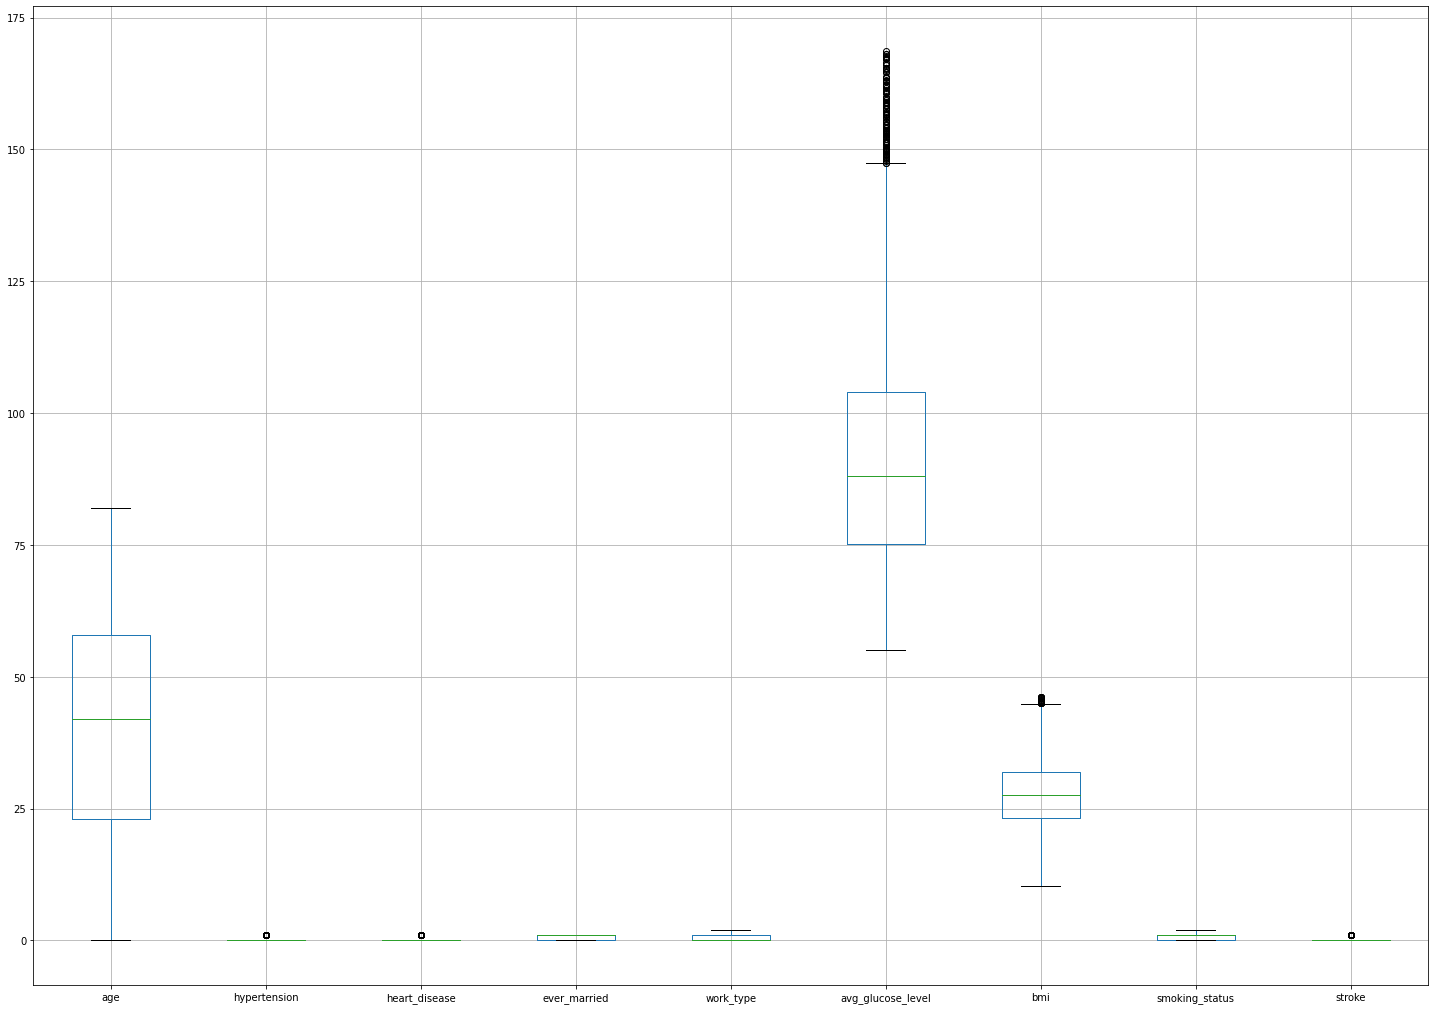

In [56]:
df_new.boxplot()

In [71]:
df_var = df_num.select_dtypes(include = np.number)
df_var.shape

(5110, 7)

In [77]:
# let's determine the X(independent) and Y(dependent) variable

X = df_new.drop('stroke',axis = 1)
Y = df_new['stroke']

It's appropriate to check the balance of classes in the data before splitting the data.

#### 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.

In [78]:
print(Y.value_counts().sort_index())

0    4227
1     165
Name: stroke, dtype: int64


In [79]:
(df_new['stroke'].value_counts()/len(df_new))*100

0    96.243169
1     3.756831
Name: stroke, dtype: float64

As seen class 0 only holds 3.7% of the whole data, which showcases that the data is highly imbalanced.

- A highly imbalanced data may cause the model to accurately learn only one class of the target.
- it is important to make sure their is balance in the data so that the algorith can aptly learn and build a good model for prediction of stroke.

SMOTE (Synthetic minority over-sampling technique) is a mthod that is used to reclassify equally, by sampling the minority class.

In [80]:
# performing SMOTE

smote = SMOTE(sampling_strategy='auto',random_state=1)

X_new,Y_new = smote.fit_resample(X,Y)

df_smote = pd.concat([X_new,Y_new])

print(Y_new.value_counts().sort_index())

0    4227
1    4227
Name: stroke, dtype: int64


The classes are equally balanced now.

In [81]:
# For building a logstic regression model scaling the data required

sc = StandardScaler()


X_scaled = pd.DataFrame(sc.fit_transform(X_new), columns = X_new.columns)

# For a logistic regression model adding a constant is required

X_scaled = sma.add_constant(X_scaled)

In [84]:
# splitting the data in a 70 : 30 ratio

x_train,x_test,y_train,y_test = train_test_split(X_scaled, Y_new, test_size = 0.3, random_state = 1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5917, 12)
(2537, 12)
(5917,)
(2537,)


In [85]:
stats.ttest_ind(x_train,y_train)

Ttest_indResult(statistic=array([ 77.08471214, -34.68011126, -36.74776069, -34.19391708,
       -34.55072847, -33.36046606, -34.1945756 , -34.01293694,
       -34.10633221, -33.60573979, -29.34031744, -33.95218918]), pvalue=array([0.00000000e+000, 4.51694292e-251, 4.84124933e-280, 1.85948498e-244,
       2.64546508e-249, 2.69088169e-233, 1.82173559e-244, 5.15310987e-242,
       2.83691197e-243, 1.47585656e-236, 1.01046293e-182, 3.38528308e-241]))

- here the pval for variables is comparatively lower. However it was already seen that the variables share a moderately low correlation with each other in the data.
- Therefore we can conclude that the train and test data are a appropriate representation of the original data.

### 22. Model Selection/hyperparameter tuning
- Try different models and fine tune their performance until you get the desired level of performance on the given dataset.
Model Evaluation
- Evaluate the models using appropriate evaluation metrics.

#### Base Model (Logistic Regression) :

- A logistic regression model will be built as the base model.
- The logistic regression omodel will be built using two libraries : scipy and scikit
- Scipy library model function will give us the significant variables
- Scikit library model will help us determine the accuracy of the model.

In [86]:
# for scipy lr model

lr_base = sma.Logit(y_train,x_train).fit()
lr_base.summary()

         Current function value: 0.394731
         Iterations: 35


/Users/shweta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5917
Model:                          Logit   Df Residuals:                     5905
Method:                           MLE   Df Model:                           11
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.4305
Time:                        14:45:40   Log-Likelihood:                -2335.6
converged:                      False   LL-Null:                       -4101.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2010     29.104     -0.007      0.994     -57.244      56.842
age                      2.3136      0.062     37.189      0.000       2.192       2.436
hypertension            -0.3248      0.036     -8.921      0.000      -0.396      -0.253
heart_disease           -0.2595      0.032     -8.084      0.000      -0.322      -0.197
ever_married            -0.4549      0.046     -9.783      0.000      -0.546      -0.364
work_type               -0.5142      0.039    -13.130      0.000      -0.591      -0.437
avg_glucose_level        0.0875      0.036      2.407      0.016       0.016       0.159
bmi                      0.1940      0.042      4.667      0.000       0.113       0.275
smoking_status          -0.1550      0.036     -4.274      0.000      -0.226      -0.084
gender_Male             -0.3664      0.038     -9.768      0.000      -0.440      -0.293
gender_Other            -0.2540   2675.832  -9.49e-05      1.000   -5244.789    5244.281
Residence_type_Urban    -0.5419      0.038    -14.338      0.000      -0.616      -0.468
========================================================================================
"""

- The algorithm ran 35 iterations before selecting the above model.
- 'BMI' and 'age' seem to be the variables that have a probability of giving a outcome with relation to the target variable.

In [87]:
# scikit library 

lr_model = LogisticRegression(random_state = 1)
lr_model.fit(x_train,y_train)

trainpred_lr = lr_model.predict(x_train)
testpred_lr = lr_model.predict(x_test)
prob1 = lr_model.predict_proba(x_test)
predproba_lr = prob1[:,1]

In [89]:
print('Accuracy table of train data :','\n',classification_report(y_train,trainpred_lr),'\n')
print('Accuracy table of test data :','\n',classification_report(y_test,testpred_lr),'\n')

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      2965
           1       0.81      0.84      0.82      2952

    accuracy                           0.82      5917
   macro avg       0.82      0.82      0.82      5917
weighted avg       0.82      0.82      0.82      5917
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1262
           1       0.81      0.83      0.82      1275

    accuracy                           0.82      2537
   macro avg       0.82      0.82      0.82      2537
weighted avg       0.82      0.82      0.82      2537
 



- The recall score gives the true postive values, which means it shows the score of predicting the actual positive values.
- For our prediction of stroke, it is important to be able to recognise actual positives for each class.
- Here the recall value is equal for class 0 and has a negligible difference for class 1.
- The accuracy score for train data and test data is equal.
- The logistic regression model is an overfit model.

Since the logistic regression went into overfitting condition, it can be optimal to perform parameter tuning to before we build a model.

#### Decision Tree Model (with hyper-parameter tuning):

- The data consists of multiple dimensions, a decision tree algorithm with optimal parameters might help building a good model.
- Using grid search cv we can find the optimal hyper parameters.

In [90]:
# firstly we'll resplit the data as classification models do not require scaled data

xtrain,xtest,ytrain,ytest = train_test_split(X_new,Y_new,test_size=0.3,random_state = 1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(5917, 11)
(2537, 11)
(5917,)
(2537,)


In [93]:
dt = DecisionTreeClassifier()

dt_params = [{'criterion':['entropy','gini'],
             'max_features':['sqrt','log2'],
             'max_depth':range(2,8),
             'min_samples_split':range(2,8),
             'min_samples_leaf':range(2,8),
             'max_leaf_nodes':range(2,8)}]

dt_grid = GridSearchCV(estimator=dt,param_grid=dt_params,cv=5)

dt_grid.fit(xtrain,ytrain)

dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'max_leaf_nodes': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [94]:
dt_model = DecisionTreeClassifier(criterion=dt_grid.best_params_.get('criterion'),
                                 max_features=dt_grid.best_params_.get('max_features'),
                                 max_depth=dt_grid.best_params_.get('max_depth'),
                                 min_samples_split=dt_grid.best_params_.get('min_samples_split'),
                                 min_samples_leaf=dt_grid.best_params_.get('min_samples_leaf'),
                                 max_leaf_nodes=dt_grid.best_params_.get('max_leaf_nodes'),
                                 random_state = 1)

dt_model.fit(xtrain,ytrain)

trainpred_dt = dt_model.predict(xtrain)
testpred_dt = dt_model.predict(xtest)
prob2 = dt_model.predict_proba(xtest)
predproba_dt = prob2[:,1]

In [95]:
print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_dt),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_dt),'\n')

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.76      0.03      0.06      2965
           1       0.50      0.99      0.67      2952

    accuracy                           0.51      5917
   macro avg       0.63      0.51      0.37      5917
weighted avg       0.63      0.51      0.36      5917
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.84      0.04      0.07      1262
           1       0.51      0.99      0.67      1275

    accuracy                           0.52      2537
   macro avg       0.68      0.52      0.37      2537
weighted avg       0.68      0.52      0.38      2537
 



- The accuracy scores of both the data is low
- The accuracy score for test data is higher than the training data
- Hence, we can call the decision tree model as an underfit model.

#### Random Forest Model:

- A random forest model combines output of multiple decision trees to reach a single result. 
- We will be using hyper parameters for this model as well

In [115]:
rf = RandomForestClassifier()

rf_params = [{'criterion':['entropy','gini'],
             'max_features':['sqrt','log2'],
             'max_depth':range(2,8),
             'min_samples_split':range(2,8),
             'min_samples_leaf':range(2,8),
             'max_leaf_nodes':range(2,8)}]

rf_grid = GridSearchCV(estimator=rf,param_grid=dt_params,cv=5)

rf_grid.fit(xtrain,ytrain)

rf_grid.best_params_

KeyboardInterrupt: 

In [ ]:
rf_model = RandomForestClassifier(criterion=dt_grid.best_params_.get('criterion'),
                                 max_features=dt_grid.best_params_.get('max_features'),
                                 max_depth=dt_grid.best_params_.get('max_depth'),
                                 min_samples_split=dt_grid.best_params_.get('min_samples_split'),
                                 min_samples_leaf=dt_grid.best_params_.get('min_samples_leaf'),
                                 max_leaf_nodes=dt_grid.best_params_.get('max_leaf_nodes'),
                                 random_state = 1)

rf_model.fit(xtrain,ytrain)

trainpred_rf = rf_model.predict(xtrain)
testpred_rf = rf_model.predict(xtest)
prob3 = rf_model.predict_proba(xtest)
predproba_rf = prob3[:,1]

In [ ]:
print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_rf),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_rf),'\n')

#### ADA Boost Model:

- ADA boosting using is a non random sampling technique and builds a model by classifying one after another.

In [101]:
ada_model = AdaBoostClassifier(n_estimators = 50,random_state = 1)

ada_model.fit(xtrain,ytrain)

trainpred_ada = ada_model.predict(xtrain)
testpred_ada = ada_model.predict(xtest)
prob4 = ada_model.predict_proba(xtest)
predproba_ada = prob4[:,1]

In [102]:
print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_ada),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_ada),'\n')

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      2965
           1       0.83      0.89      0.86      2952

    accuracy                           0.85      5917
   macro avg       0.85      0.85      0.85      5917
weighted avg       0.85      0.85      0.85      5917
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      1262
           1       0.82      0.88      0.85      1275

    accuracy                           0.84      2537
   macro avg       0.84      0.84      0.84      2537
weighted avg       0.84      0.84      0.84      2537
 



- Here the recall scores (true positive rate) is almost for test and train data.
- The accuracy score as well almost similar
- Hence we can conclude that this model is in overfit condition.

In [111]:
#### Gradient Boost Model:

In [104]:
gb_model = GradientBoostingClassifier(n_estimators=200,random_state=1)

gb_model.fit(xtrain,ytrain)

trainpred_gb = gb_model.predict(xtrain)
testpred_gb = gb_model.predict(xtest)
prob5 = gb_model.predict_proba(xtest)
predproba_gb = prob5[:,1]

In [105]:
print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_gb),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_gb),'\n')

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      2965
           1       0.92      0.96      0.94      2952

    accuracy                           0.94      5917
   macro avg       0.94      0.94      0.94      5917
weighted avg       0.94      0.94      0.94      5917
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      1262
           1       0.88      0.93      0.91      1275

    accuracy                           0.90      2537
   macro avg       0.90      0.90      0.90      2537
weighted avg       0.90      0.90      0.90      2537
 



- The recall score for train data is significantly higher for train data and test data.
- The difference between train and test accuracy score is acceptable.
- Hence we can conclude that this is a model with a goodfit condition.

#### XGBoost Model :

In [106]:
xgb = XGBClassifier()

xgb_params = ({'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6],
                   'max_depth':range(2,5),
                   'gamma':[1,2,3,4]})

xgb_grid = GridSearchCV(estimator = xgb, param_grid = xgb_params, cv = 5)

xgb_grid.fit(xtrain,ytrain)

xgb_grid.best_params_

{'gamma': 1, 'learning_rate': 0.5, 'max_depth': 4}

In [108]:
xgb_model = XGBClassifier(learning_rate= xgb_grid.best_params_.get('learning_rate'),
                         max_depth =xgb_grid.best_params_.get('max_depth'),
                         gamma =xgb_grid.best_params_.get('gamma'),
                         random_state = 1)

xgb_model.fit(xtrain,ytrain)

trainpred_xgb = xgb_model.predict(xtrain)
testpred_xgb = xgb_model.predict(xtest)
prob6 = xgb_model.predict_proba(xtest)
predproba_xgb = prob6[:,1]

In [109]:
print('Accuracy table of train data :','\n',classification_report(ytrain,trainpred_xgb),'\n')
print('Accuracy table of test data :','\n',classification_report(ytest,testpred_xgb),'\n')

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2965
           1       0.98      0.99      0.98      2952

    accuracy                           0.98      5917
   macro avg       0.98      0.98      0.98      5917
weighted avg       0.98      0.98      0.98      5917
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1262
           1       0.93      0.96      0.95      1275

    accuracy                           0.95      2537
   macro avg       0.95      0.95      0.95      2537
weighted avg       0.95      0.95      0.95      2537
 



- The accuracy score for the train and test data is in acceptable range.
- Recall score for xgb model also seem to have enough difference to pass the model as acceptable.
- We can consider XGB model as a good model as well.

#### Plotting the roc auc plot.

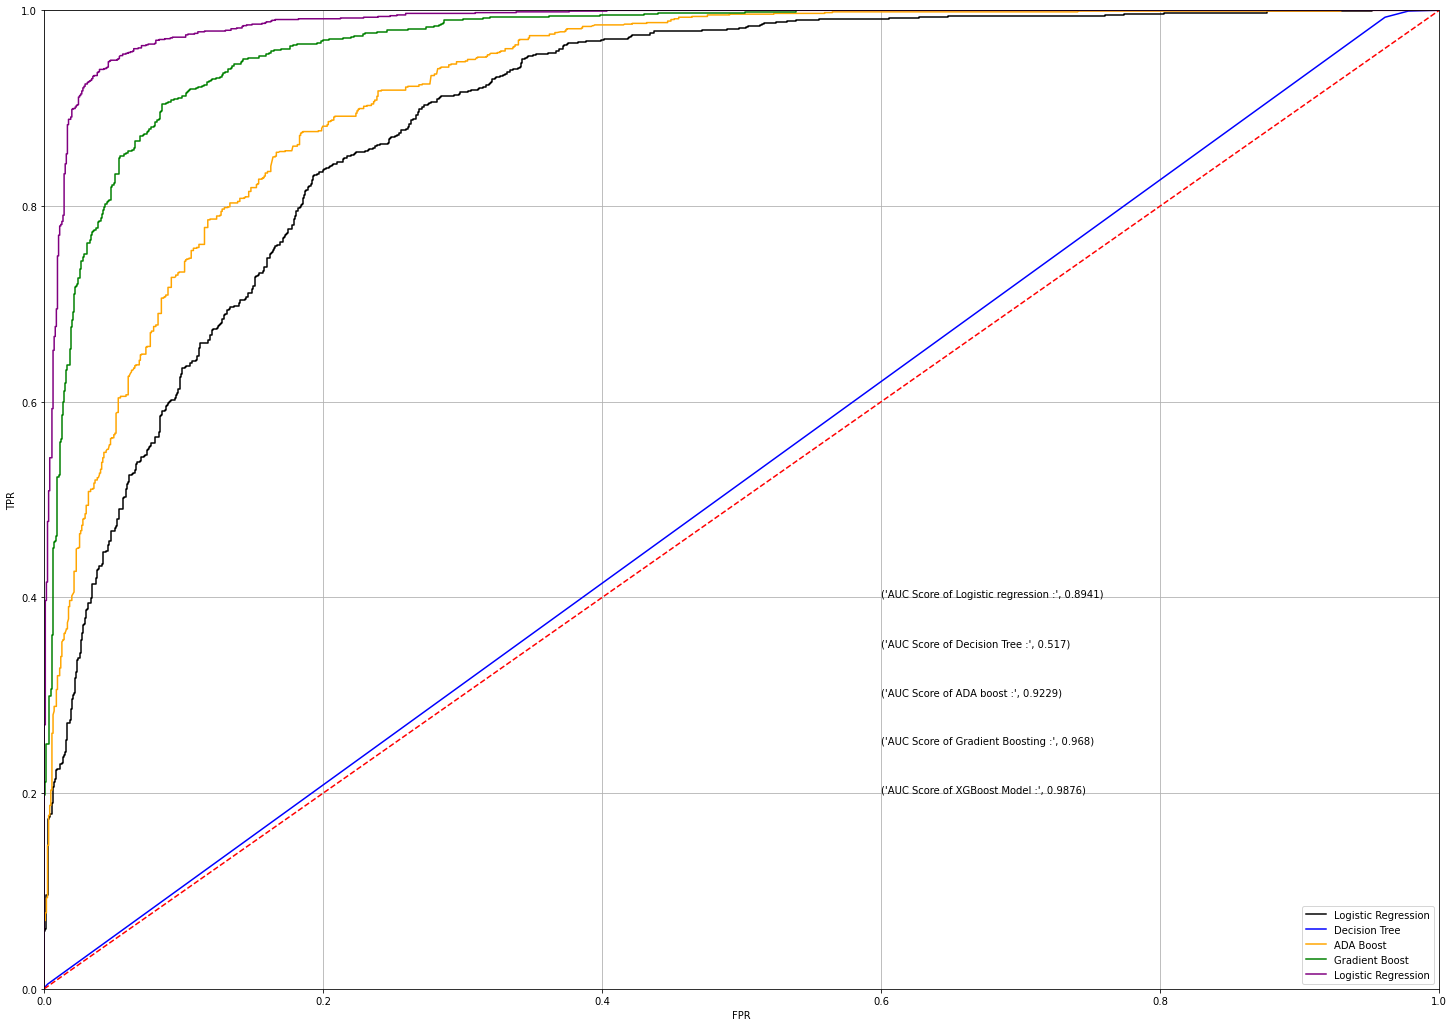

In [113]:
# for Logistic Regression
fpr,tpr,thresholds = roc_curve(y_test,predproba_lr)
plt.plot(fpr,tpr,color = 'black',label = 'Logistic Regression')

# for Decision Tree
fpr,tpr,thresholds = roc_curve(ytest,predproba_dt)
plt.plot(fpr,tpr,color = 'blue',label = 'Decision Tree')

# For adaboost
fpr,tpr,thresholds = roc_curve(ytest,predproba_ada)
plt.plot(fpr,tpr,color = 'orange',label = 'ADA Boost')

# for Gradient boost
fpr,tpr,thresholds = roc_curve(ytest,predproba_gb)
plt.plot(fpr,tpr,color = 'green',label = 'Gradient Boost')

# for XGB Boost
fpr,tpr,thresholds = roc_curve(ytest,predproba_xgb)
plt.plot(fpr,tpr,color = 'purple',label = 'Gradient Boost')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')

#AUC of logistic regression
auc_lr = round(roc_auc_score(y_test,predproba_lr),4)
plt.text(x = 0.6,y = 0.4,s = ('AUC Score of Logistic regression :',auc_lr))

# AUC for decision tree
auc_dt = round(roc_auc_score(ytest,predproba_dt),4)
plt.text(x = 0.6,y = 0.35,s = ('AUC Score of Decision Tree :',auc_dt))

# AUC of ADA boost
auc_ada = round(roc_auc_score(ytest,predproba_ada),4)
plt.text(x = 0.6,y = 0.3,s = ('AUC Score of ADA boost :',auc_ada))

# AUC of Gradient Boosting Model
auc_gb = round(roc_auc_score(ytest,predproba_gb),4)
plt.text(x = 0.6,y = 0.25,s = ('AUC Score of Gradient Boosting :',auc_gb))

#AUC of XGB Boost
auc_xgb = round(roc_auc_score(ytest,predproba_xgb),4)
plt.text(x = 0.6,y = 0.2,s = ('AUC Score of XGBoost Model :',auc_xgb))

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()

- The XGBoost classification model has the highest roc score of 0.9876.
- XGBoost model will be the appropriate choice to pick for stroke prediction. 